# This analysis provides valuable insights into user demographics and behavior, focusing on various factors such as gender, age, device usage, subscription types, and revenue. We aim to understand the relationship between key attributes like age, subscription plan, and revenue, offering actionable insights for business decision-making.

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

In [175]:
df=pd.read_csv(r'C:\Users\matti\OneDrive\Desktop\Projects_Analysis\Netflix\kagglehub\datasets\arnavsmayan\netflix-userbase-dataset\versions\3\Netflix UserBase.csv')

In [176]:
df.shape

(2500, 10)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [178]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [179]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# # Transformation

In [180]:

# Transform coulmn Date Time but stored as Object

df['Join Date']=pd.to_datetime(df['Join Date'])
df['Last Payment Date']=pd.to_datetime(df['Last Payment Date']) # add .dt.strftime(format='%d-%m-%Y') to convert it to string in the format dd-mm-yyyy
df.head()

C:\Users\matti\AppData\Local\Temp\ipykernel_24176\3948733036.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Join Date']=pd.to_datetime(df['Join Date'])
C:\Users\matti\AppData\Local\Temp\ipykernel_24176\3948733036.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Payment Date']=pd.to_datetime(df['Last Payment Date']) # add .dt.strftime(format='%d-%m-%Y') to convert it to string in the format dd-mm-yyyy


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [181]:
# add column continent
df['Continent']='X'

for index, row in df.iterrows():
    if row['Country']=='United States':
        df.at[index,'Continent']='North America'
    elif row['Country']=='Canada':
        df.at[index,'Continent']='North America'
    elif row['Country']=='Mexico':
        df.at[index,'Continent']='Central America'
    elif row['Country']=='Brazil':
        df.at[index,'Continent']='South America'
    elif row['Country']=='Australia':
        df.at[index,'Continent']='Oceania'
    elif row['Country']=='United Kingdom':
        df.at[index,'Continent']='Europe'
    elif row['Country']=='Germany':
        df.at[index,'Continent']='Europe'
    elif row['Country']=='Italy':
        df.at[index,'Continent']='Europe'
    elif row['Country']=='France':
        df.at[index,'Continent']='Europe'
    elif row['Country']=='Spain':
        df.at[index,'Continent']='Europe'


In [182]:
# add currency
df['Currency'] = 'x'

for index, row in df.iterrows():
    if row['Country']=='United States':
        df.at[index,'Currency']='US Dollar'
    elif row['Country']=='Canada':
        df.at[index,'Currency']='Canadian Dollar'
    elif row['Country']=='Mexico':
        df.at[index,'Currency']='Mexican Pesos'
    elif row['Country']=='Brazil':
        df.at[index,'Currency']='Brazil Real'
    elif row['Country']=='Australia':
        df.at[index,'Currency']='Australian Dollar'
    elif row['Country']=='United Kingdom':
        df.at[index,'Currency']='UK Pound Sterlin'
    elif row['Country']=='Germany':
        df.at[index,'Currency']='Euro'
    elif row['Country']=='Italy':
        df.at[index,'Currency']='Euro'
    elif row['Country']=='France':
        df.at[index,'Currency']='Euro'
    elif row['Country']=='Spain':
        df.at[index,'Currency']='Euro'

In [183]:
#add currency exchange
df['Exchange v US Dollar'] = 'x'

for index, row in df.iterrows():
    if row['Country']=='United States':
        df.at[index,'Exchange v US Dollar']= 1
    elif row['Country']=='Canada':
        df.at[index,'Exchange v US Dollar']= 0.72
    elif row['Country']=='Mexico':
        df.at[index,'Exchange v US Dollar']= 0.05
    elif row['Country']=='Brazil':
        df.at[index,'Exchange v US Dollar']= 0.17
    elif row['Country']=='Australia':
        df.at[index,'Exchange v US Dollar']= 0.66
    elif row['Country']=='United Kingdom':
        df.at[index,'Exchange v US Dollar']= 1.29
    elif row['Country']=='Germany':
        df.at[index,'Exchange v US Dollar']= 1.09
    elif row['Country']=='Italy':
        df.at[index,'Exchange v US Dollar']=1.09
    elif row['Country']=='France':
        df.at[index,'Exchange v US Dollar']=1.09
    elif row['Country']=='Spain':
        df.at[index,'Exchange v US Dollar']=1.09

In [184]:
# Creation of age categories
df['Age_cat']=df['Age'].apply(lambda x: 'Gen X' if x > 43 else ('Millenials' if x > 28 else 'Gen Z' ))

In [185]:
# Conversion of all the revuenues in US $
df['Monthly Revenue Conversion'] = df['Monthly Revenue']*df['Exchange v US Dollar']
df['Monthly Revenue Conversion']=df['Monthly Revenue Conversion'].round(1)
df['Monthly Revenue Conversion']=pd.to_numeric(df['Monthly Revenue Conversion']).round(2)
df['Exchange v US Dollar']=pd.to_numeric(df['Exchange v US Dollar']).round(2)
df=df.rename(columns={'Monthly Revenue':'Monthly Revenue Loc Currency'})

# #Analysis

**Users by Country**

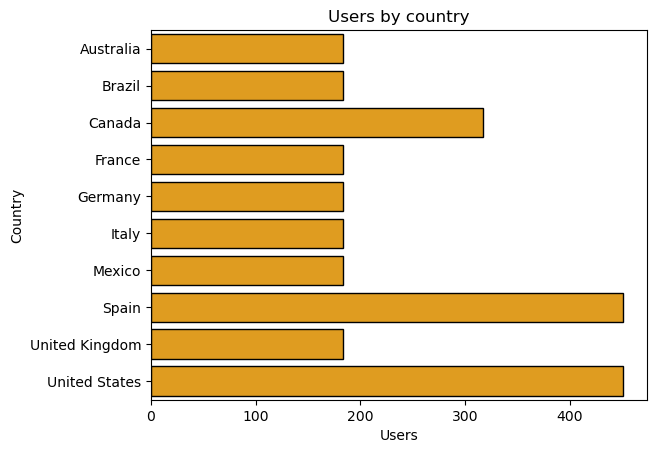

In [186]:
df_countries=df.groupby('Country')['User ID'].count().reset_index()
sns.barplot(data=df_countries,x='User ID',y='Country',color='orange',edgecolor='black')
plt.xlabel('Users')
plt.ylabel('Country')
plt.title('Users by country')
plt.show()

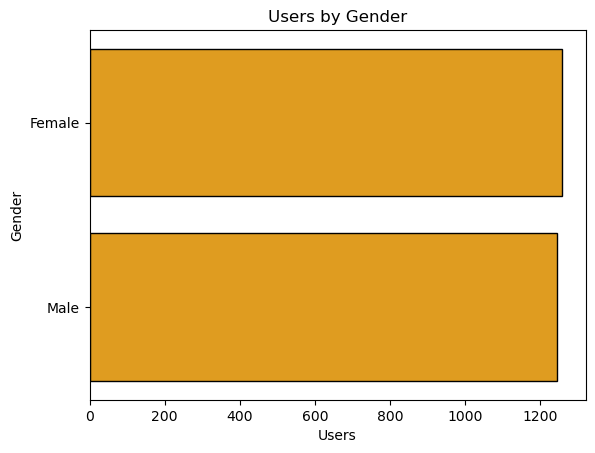

In [187]:
df_gender_=df.groupby('Gender')['User ID'].count().reset_index()
sns.barplot(data=df_gender_,x='User ID',y='Gender',color='orange',edgecolor='black')
plt.xlabel('Users')
plt.ylabel('Gender')
plt.title('Users by Gender')
plt.show()

**Gender Analysis**

Analysing the Number of user by gender we can see that the amount of subscription is slightly higher fro Female users and this is also refleceted on the total revenue coming from the related subscription.

In [188]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.5028
Male      0.4972
Name: proportion, dtype: float64

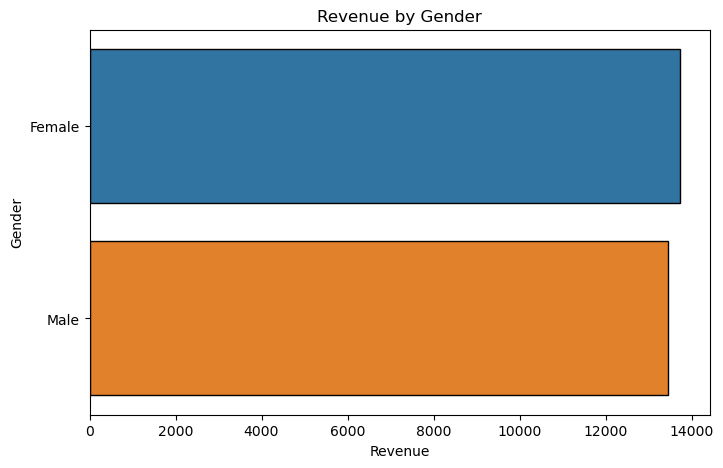

In [189]:
df_gender=df.groupby(['Gender'])['Monthly Revenue Conversion'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=df_gender,x='Monthly Revenue Conversion',y='Gender',edgecolor='black')
plt.xlabel('Revenue')
plt.ylabel('Gender')
plt.title('Revenue by Gender')
plt.show()

**despite in general Revenue from Female user is higher we can see how some Countries have an higher revenue coming for Male subscription**

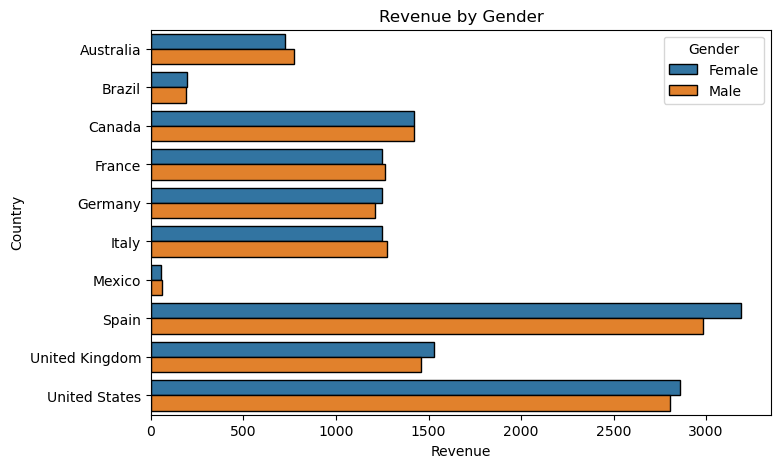

In [190]:
df_gender=df.groupby(['Country','Gender'])['Monthly Revenue Conversion'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=df_gender,x='Monthly Revenue Conversion',y='Country',hue='Gender',edgecolor='black')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.title('Revenue by Gender')
plt.show()

# User distribution by Age category

**In the chart below we can see the distribution of subscription by gender and age category and see how the majority of Netflix users are born between 1981 and 1996 and how this is reflected also at country level**

Text(0, 0.5, 'Generation')

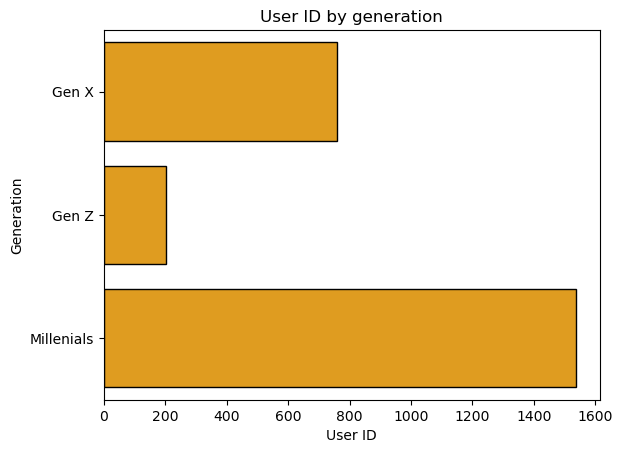

In [191]:
df_age=df.groupby('Age_cat')['User ID'].count().reset_index()
plt=sns.barplot(x='User ID',y='Age_cat', data=df_age, color='orange',edgecolor='black')
plt.grid(False)
plt.set_title('User ID by generation')  # Set title
plt.set_xlabel('User ID')                        # Set x-axis label
plt.set_ylabel('Generation') 

Text(24.0, 0.5, 'Generation User per Country')

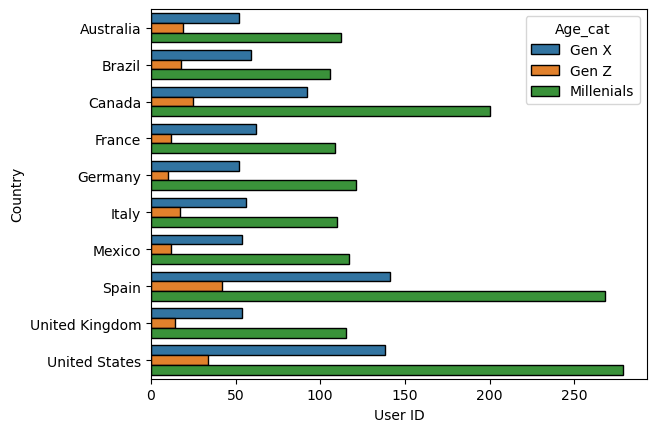

In [192]:
df_age1=df.groupby(['Country','Age_cat'])['User ID'].count().reset_index()
sns.barplot(data=df_age1,x='User ID',y='Country',hue='Age_cat',edgecolor='black')
plt.set_xlabel('User ID')
plt.set_ylabel('Generation User per Country')


# Age category distribution by gender

In [193]:
df_age_country_gender=df.groupby(['Gender','Age_cat'])['User ID'].count().reset_index()

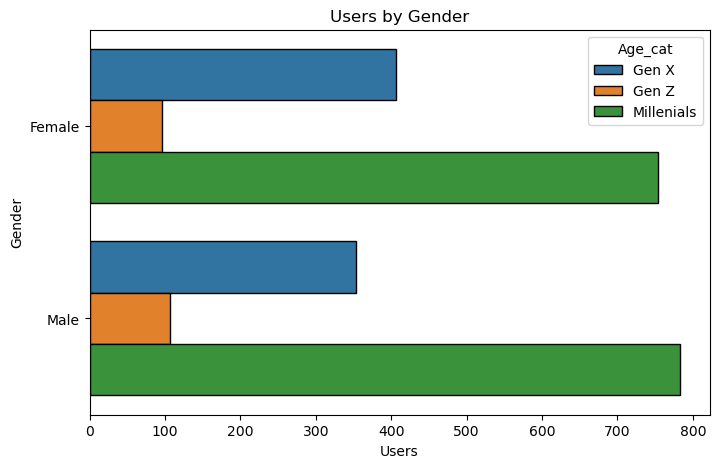

In [195]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
sns.barplot(data=df_age_country_gender,x='User ID',y='Gender',hue='Age_cat',edgecolor='black')
plt.xlabel('Users')
plt.ylabel('Gender')
plt.title('Users by Gender')
plt.show()

<Figure size 1000x600 with 0 Axes>

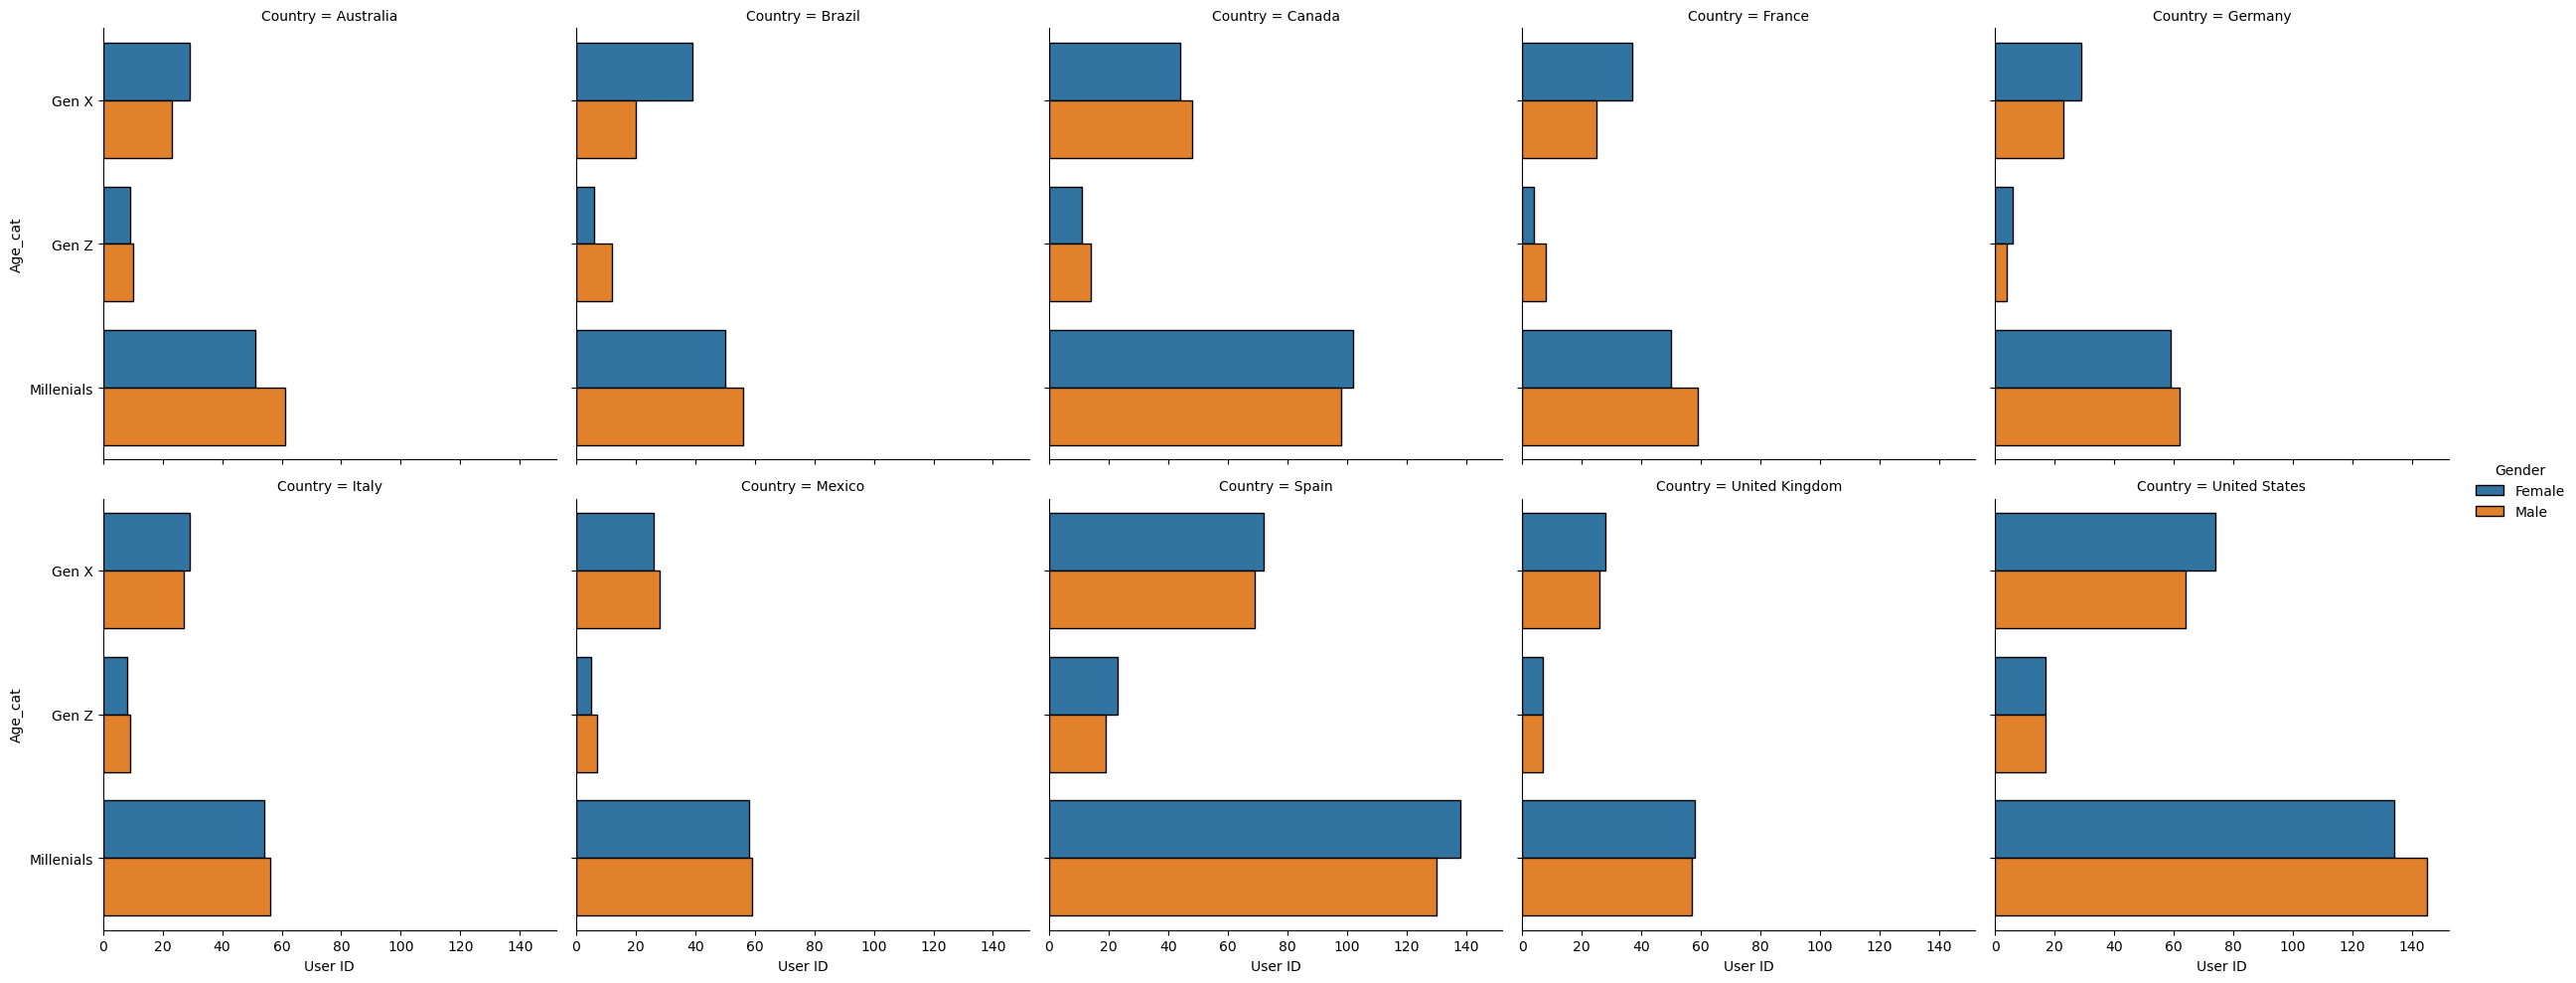

In [ ]:
df_gender_country=df.groupby(['Country','Gender','Age_cat'])['User ID'].count().reset_index()
plt.figure(figsize=(10,6))
sns.catplot(
    data=df_gender_country, kind='bar',
    x= 'User ID', 
    y= 'Age_cat',
    col='Country',
    hue='Gender',
    edgecolor='black',
    col_wrap= 5)


# Analysis of Device usage 

**It is interesting how despite Netflix offer mainly a video streaming on demand service, the main device used by the users is laptop or tablet which might open to more insight about the average age of user**

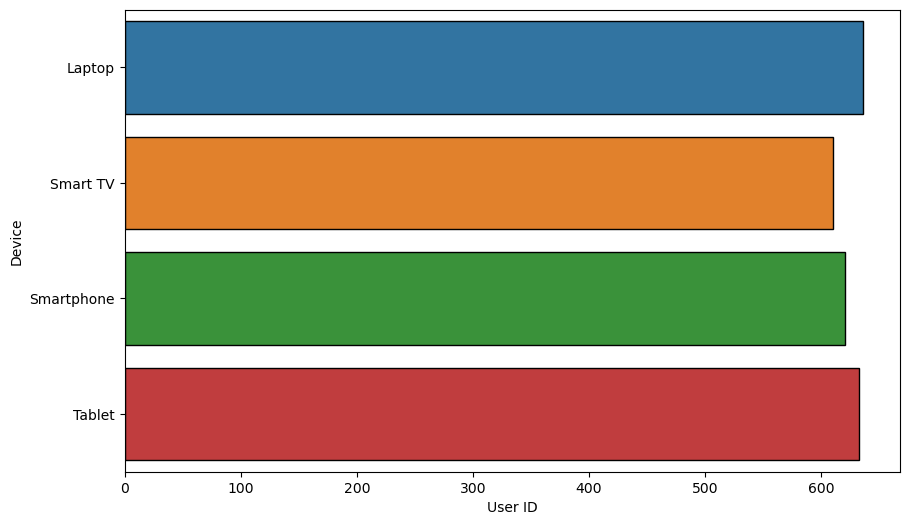

In [ ]:
df_device1=df.groupby(['Device'])['User ID'].count().reset_index()
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(data=df_device1, 
            x='User ID',            # Set 'User ID' as x-axis
            y='Device',            # Set 'Country' as y-axis
            edgecolor='black'
            )
plt.show() 

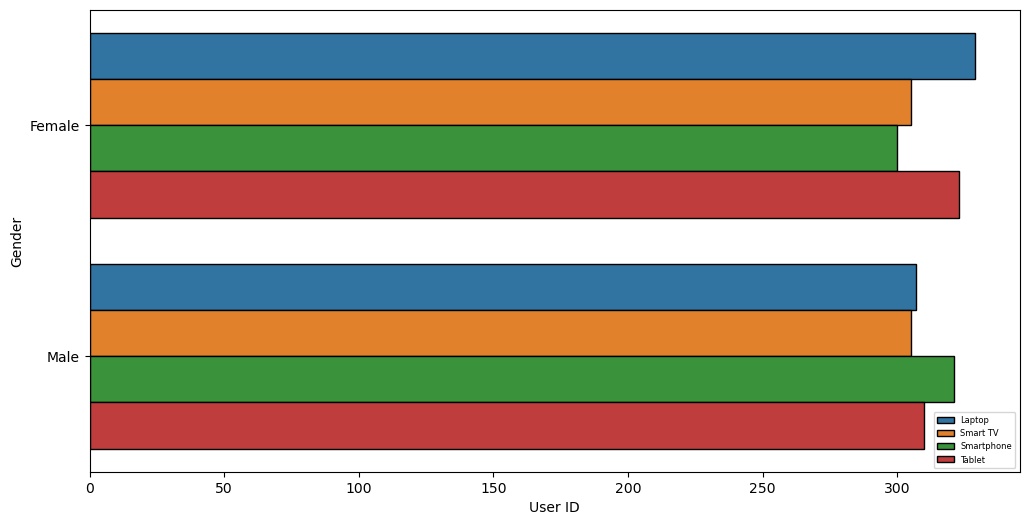

In [ ]:
df_device_gender=df.groupby(['Device','Gender'])['User ID'].count().reset_index()
plt.figure(figsize=(12, 6))  # Optional: Set the figure size
sns.barplot(data=df_device_gender, 
            x='User ID',            # Set 'User ID' as x-axis
            y='Gender',            # Set 'Country' as y-axis
            hue='Device',
            edgecolor='black'
            )
plt.legend(loc='best', fontsize=6, markerscale=2)
plt.show()  

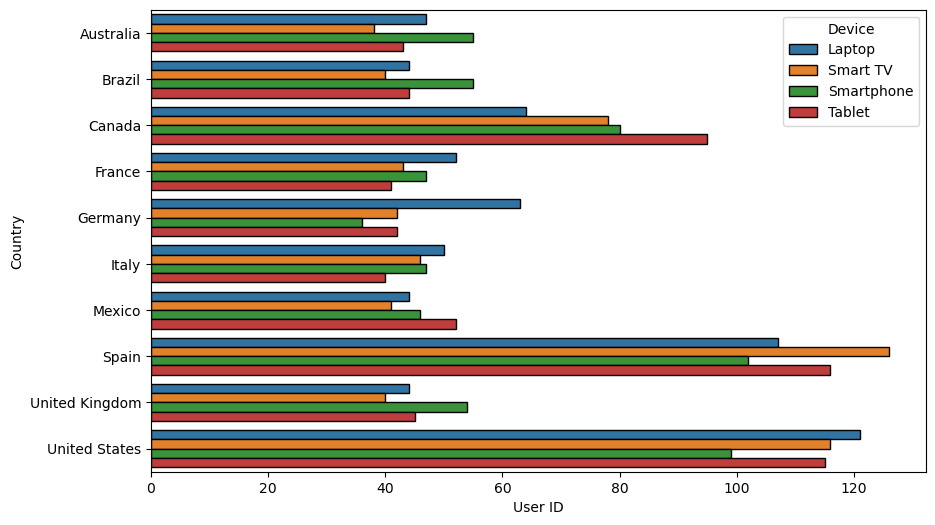

In [ ]:
df_device=df.groupby(['Device','Country'])['User ID'].count().reset_index()
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(data=df_device, 
            x='User ID',            # Set 'User ID' as x-axis
            y='Country',            # Set 'Country' as y-axis
            hue='Device',
            edgecolor='black'
            )
plt.show()  

# Age distribution 

c:\Users\matti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


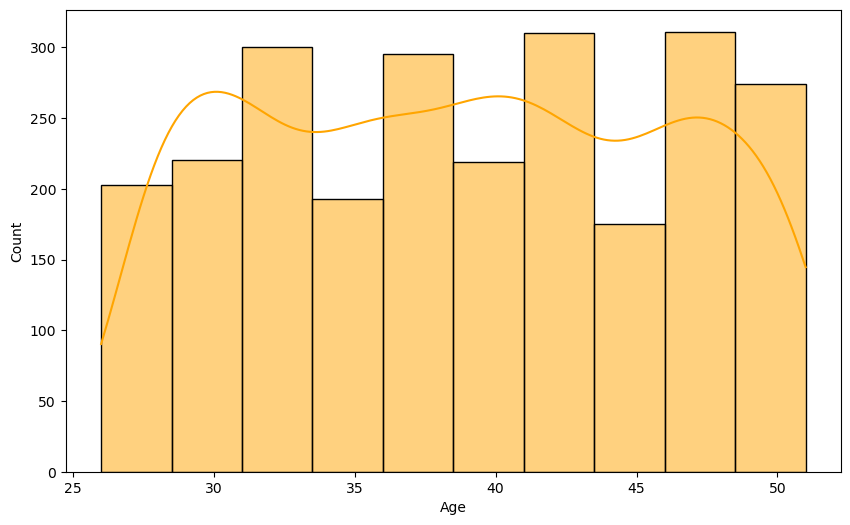

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Age'], bins=10, color='orange',edgecolor='black',kde=True)
plt.show()

In [ ]:
import scipy.stats as stats

# Hypothesis Test of the mean of Age 

$ H0 $= the average user age is 38.79 

$ H1 $ = the average user age is different than 38.79 

In [ ]:
#Taking a random sample of 50 user age from the original sample and comparing the mean with the one of the big sample
alpha = 0.05
sample_size=50
df_mean_sample=np.random.choice(df['Age'],sample_size)
df_mean_sample=pd.DataFrame(df_mean_sample).reset_index()
df_mean_sample.rename(columns={0:'Avg_age'},inplace=True)

In [ ]:
point_estimate_age_mean=df['Age'].mean()
sample_mean=np.mean(df_mean_sample['Avg_age'])
std_sample=np.std(df_mean_sample['Avg_age'],ddof=1)
standard_error=std_sample/np.sqrt(len(df_mean_sample))
print(f'the average user mean is {point_estimate_age_mean}')
print(f'the average sample mean is {sample_mean}')
print(f'the std of the sample is {std_sample}')
print(f'the standard error of the sample is {standard_error}')

the average user mean is 38.7956
the average sample mean is 40.44
the std of the sample is 6.839739820806528
the standard error of the sample is 0.9672852817687915


In [ ]:
T_score=(sample_mean-point_estimate_age_mean)/(std_sample/np.sqrt(len(df_mean_sample)))
print(f'the T score is {T_score}')

the T score is 1.7000155290205847


In [ ]:
CV= stats.t.ppf(1-0.025,49)
print(f'the critical value is {CV}')

the critical value is 2.009575234489209


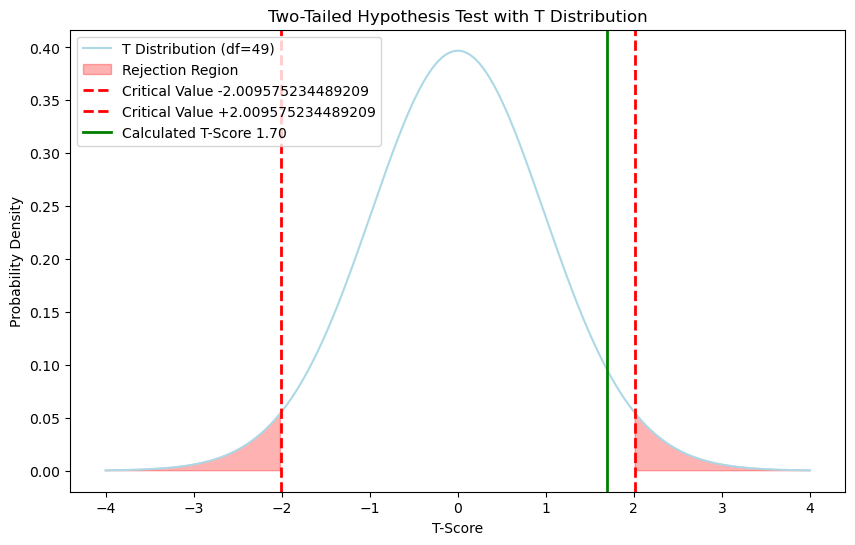

The Tscore 1.7000155290205847 is smaller than the Critical value 2.009575234489209 hence we cannot reject the null hypothesis H0 saying the average user age is exactly as our point estimate


In [197]:

# Generate a range of x values for the t-distribution
x = np.linspace(-4, 4, 1000)
df = 49  # Degrees of freedom for t-distribution
pdf = stats.t.pdf(x, df)  # Probability density function for t-distribution

# Critical values = CV
#T_score = T_score
 # Calculated from stats.t.ppf(1 - 0.05, df)
  # Example T-score to demonstrate positioning

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='T Distribution (df=49)', color='lightblue')

# Highlight the rejection regions
plt.fill_between(x, pdf, where=(x <= -CV) | (x >= CV), color='red', alpha=0.3, label='Rejection Region')

# Mark the critical values
plt.axvline(-CV, color='red', linestyle='dashed', linewidth=2, label=f'Critical Value -{CV}')
plt.axvline(CV, color='red', linestyle='dashed', linewidth=2, label=f'Critical Value +{CV}')


# Mark the calculated T-score
plt.axvline(T_score, color='green', linestyle='solid', linewidth=2, label=f'Calculated T-Score {T_score:.2f}')

# Add titles, labels, and legend
plt.title('Two-Tailed Hypothesis Test with T Distribution')
plt.xlabel('T-Score')
plt.ylabel('Probability Density')
plt.legend(loc='best')
plt.grid(False)
plt.show()

if T_score > CV:
  print(f'The Tscore {T_score} is bigger than the Critical value {CV} hence we can reject the null hypothesis H0 saying that the average User Age is differrent than our point estimate')
else:
  print(f'The Tscore {T_score} is smaller than the Critical value {CV} hence we cannot reject the null hypothesis H0 saying the average user age is exactly as our point estimate')